### **Pré-requisitos**

- Rodar o notebook `S&M_inicial.ipynb` disponível na aba 'Files' do MS Teams
- Instalar [Node.js >= v.10.x](https://github.com/nodesource/distributions)
- No terminal, instalar [Jupyter Widgets](https://developer.aliyun.com/mirror/npm/package/@jupyter-widgets/jupyterlab-manager)

  `jupyter labextension install @jupyter-widgets/jupyterlab-manager`

In [52]:
import importlib, os
if importlib.util.find_spec("ipywidgets") is None:
    !pip install ipywidgets
if not os.path.exists('suporte/'):
    os.makedirs('suporte/')
if not os.path.exists('suporte/156553__davidkyoku__singing-one-note.wav'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula01/156553__davidkyoku__singing-one-note.wav -P suporte/
if not os.path.exists('suporte/358388__mtg__sax-alto-c4.wav'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula01/358388__mtg__sax-alto-c4.wav -P suporte/
if not os.path.exists('suporte/469648__tarane468__005-c3.wav'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula01/469648__tarane468__005-c3.wav -P suporte/
if not os.path.exists('suporte/100m_0.mat'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula01/100m_0.mat -P suporte/
if not os.path.exists('suporte/random_signal.csv'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula01/random_signal.csv -P suporte/
if not os.path.exists('suporte/cases-brazil-cities-time.csv'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/aula01/cases-brazil-cities-time.zip -P suporte/
    import zipfile
    with zipfile.ZipFile('suporte/cases-brazil-cities-time.zip', 'r') as zip_ref:
        zip_ref.extractall('suporte/')
    if os.path.exists('suporte/cases-brazil-cities-time.csv'):
        os.remove('suporte/cases-brazil-cities-time.zip')
if not os.path.exists('YouTube-icon-pq.png'):
    !wget https://github.com/iperetta/FEELT31526/raw/master/YouTube-icon-pq.png
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.io
import pandas as pd
from IPython.display import display
from ipywidgets import interact, fixed
import thinkdsp as tdsp

In [4]:
def graph_size(n):
    """Função auxiliar para definir tamanho dos gráficos"""
    return (n*(1+5**0.5)/2, n)

#### **Observação**

O módulo _thinkdsp_ acompanha o livro livre [_Think DSP_](https://greenteapress.com/wp/think-dsp/) (em inglês) de Allen B. Downey e disponibiliza classes e funções para trabalharmos com sinais. 

A documentação do módulo _thinkdsp_ pode ser encontrada [aqui](http://greenteapress.com/thinkdsp.html), em inglês. 

---
---

# **Aula 01a: Introdução e Classificação de Sinais**

Um sinal é uma grandeza que é função de uma ou mais variáveis independentes. Representa uma quantidade ou variável física com a qual podemos interagir e que tipicamente contém informações sobre o comportamento ou a natureza de um fenômeno. Pode ser visto também como um conjunto de dados ou de informação.

**Sinais**<sup>1</sup> são representados por funções reais ou complexas de uma ou mais variáveis independentes. Podem ser unidimensionais (com apenas uma variável independente) ou multidimensionais (se mais de uma variável independente). Para muitos dos sinais unidimensionais, a variável independente é naturalmente associada com o tempo, mesmo que possa não corresponder ao "tempo real". Sinais multidimensionais podem se referir ao espaço, mesmo que possa não ser o geográfico. Nesse curso, trabalharemos com sinais undimensionais (sons) e multidimensionais (imagens e vídeos).

Um sinal é classsificado como **contínuo** ou **de tempo contínuo** quando é uma quantidade variável cujo domínio, que muitas vezes é o tempo, é um contínuo, ou seja, o domínio da função é um conjunto incontável (e.g. números reais). A função geradora em si não precisa ser contínua. 

Um sinal é classsificado como **discreto** ou **de tempo discreto** quando é uma série de tempo que consiste em uma sequência de quantidades. Os sinais de tempo discreto podem ter várias origens, mas geralmente podem ser classificados em um de dois grupos:

- Ao adquirir valores de um sinal analógico em taxa constante ou variável. Este processo é chamado de amostragem e possui uma taxa de amostragem associada (sinal obtido por amostragem de uma sequência em tempos uniformemente espaçados).
- Observando um processo de tempo inerentemente discreto, como o valor de pico semanal de alguma grandeza ou um indicador econômico específico.

Quando a variável independente é contínua, usamos parênteses como notação. Quando discreta, usamos colchetes. Por exemplo:

> *x(t)* corresponde a um sinal contínuo no tempo (CT). Na natureza, normalmente encontramos sinais contínuos

> *x[n]* corresponde a um sinal discreto no tempo (DT), também conhecido como sinal amostrado. Sinais digitais, por exemplo, são essencialmente discretos no tempo.

As notações *x(·)* e *x[·]* também são utilizadas para se referir ao sinal completo; a variável *t* ou *n* é usada para se referir ao tempo.

---

<sup>1</sup> Definição livremente traduzida da apresentada no livro *Signals, Systems and Inference* de A.V.Oppenheim e G.Verghese (2015).

## **Classificação de sinais**

Sinais podem ser classificados em diversas categorias. Seguem as mais utilizadas:

- **Contínuos / Discretos**
  
  - Um sinal **contínuo** possui a(s) grandeza(s) que compõe o domínio da função como sendo um conjunto incontável (e.g. números reais).
  
  - Um sinal **discreto** quando a(s) grandeza(s) que compõe o domínio da função consistem em uma sequência de quantidades (identificadores de amostras).

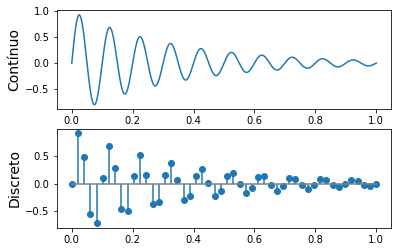

In [55]:
plt.subplot(211)
x = np.linspace(0,1,1000)
plt.plot(x, np.exp(-3*x)*np.sin(2*np.pi*10*x))
plt.ylabel("Contínuo", fontsize=14)
plt.subplot(212)
x = np.linspace(0,1,50)
plt.stem(x, np.exp(-3*x)*np.sin(2*np.pi*10*x), basefmt='gray', use_line_collection=True)
plt.ylabel("Discreto", fontsize=14)
plt.show()

- **Pares / Ímpares**
  
  - Sinais **pares** são sinais simétricos com um eixo vertical de simetria (em sinais varientes no tempo, tipicamente em t = 0).
  
  - Sinais **ímpares** também possuem "simetria" no eixo vertical, mas a parte simétrica se encontra refletida no eixo horizontal.

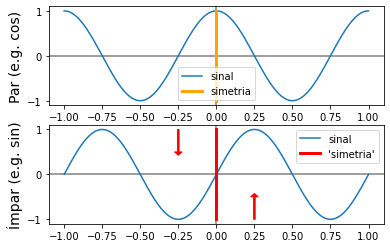

In [10]:
x = np.linspace(-1,1,1000)
plt.subplot(211)
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.plot(x, np.cos(2*np.pi*x), label="sinal")
plt.plot([0,0],[-1,1], 'orange', label="simetria", linewidth=3)
plt.ylabel("Par (e.g. cos)", fontsize=14)
plt.legend()
plt.subplot(212)
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.plot(x, np.sin(2*np.pi*x), label="sinal")
plt.plot([0,0],[-1,1], 'r', label="'simetria'", linewidth=3)
plt.arrow(0.25,-1, 0, 0.5, width=0.01, head_width = 0.05, color='r')
plt.arrow(-0.25,1, 0, -0.5, width=0.01, head_width = 0.05, color='r')
plt.ylabel("Ímpar (e.g. sin)", fontsize=14)
plt.legend()
plt.show()

- **Periódicos / Aperiódicos**

  - Sinais **periódicos** são sinais que se repetem depois de algum tempo, ou seja:
  
    $\large \exists \tau \quad | \quad x(t) = x(t - \tau)$. 
  
  - Sinais **aperiódicos** são os sinais que não possuem padrões de repetição no tempo.


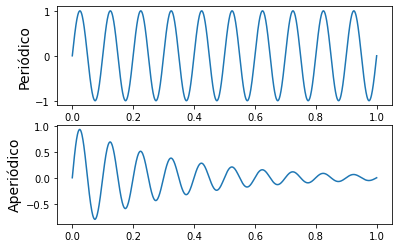

In [21]:
x = np.linspace(0,1,1000)
plt.subplot(211)
plt.plot(x, np.sin(2*np.pi*10*x))
plt.ylabel("Periódico", fontsize=14)
plt.subplot(212)
plt.plot(x, np.exp(-3*x)*np.sin(2*np.pi*10*x))
plt.ylabel("Aperiódico", fontsize=14)
plt.show()

- **Reais / Complexos**
  
  - Sinais **reais** são aqueles provenientes de grandezas cujas medidas podem ser descritas por números reais; incluem os com domínio complexo. 
  
  - Sinais **complexos** são pares de dois sinais reais que carregam as partes reais e imaginárias da *medida da grandeza de interesse*; não confundir com o domínio complexo.

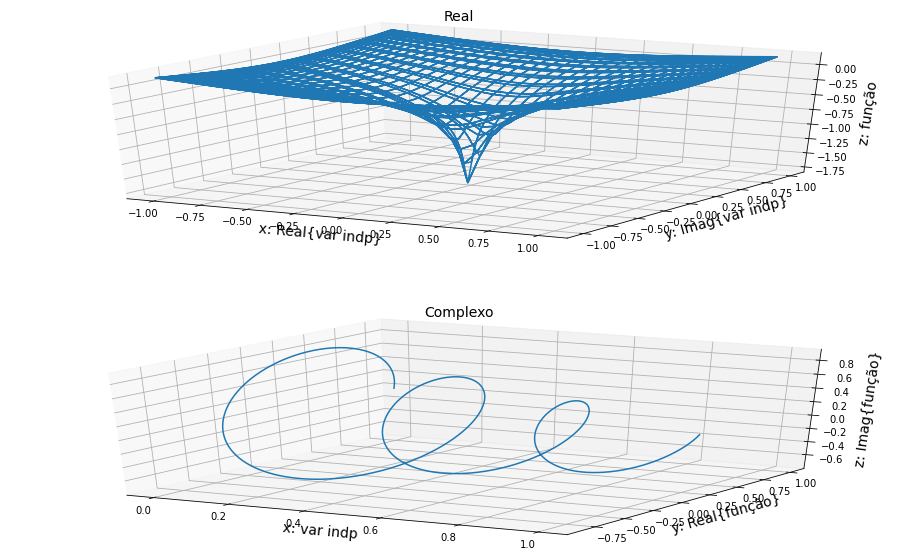

In [12]:
plt.figure(figsize=graph_size(10))
ax = plt.subplot(211, projection='3d')
aux = np.linspace(0, 1, 100)
z = np.cos(2*np.pi*aux) + 1j*np.sin(2*np.pi*aux)
Zreal, Zimag = np.meshgrid(z.real, z.imag)
fz = lambda a, b: np.log10(np.sqrt(a**2 + b**2))
ax.plot_wireframe(Zreal, Zimag, fz(Zreal, Zimag))
plt.title("Real", fontsize=14)
ax.set_xlabel("x: Real{var indp}", fontsize=14)
ax.set_ylabel("y: Imag{var indp}", fontsize=14)
ax.set_zlabel("z: função", fontsize=14)
ax = plt.subplot(212, projection='3d')
fx = lambda t: np.exp(-t)*np.exp(1j*2*np.pi*3*t)
x = np.linspace(0, 1, 1000)
ax.plot(x, np.real(fx(x)), zs=np.imag(fx(x)), zdir='z')
plt.title("Complexo", fontsize=14)
ax.set_xlabel("x: var indp", fontsize=14)
ax.set_ylabel("y: Real{função}", fontsize=14)
ax.set_zlabel("z: Imag{função}", fontsize=14)
plt.show()

- **Determinísticos / Estocásticos**

  - Sinais determinísticos são aqueles que podem ser modelados por equações matemáticas e, caso seja identificado, é possível trabalhar com previsões. 
  
  - Sinais estocásticos são sinais que possuem dependência de uma variável aleatória e requerem o uso de estatísticas como métricas de relevância. É possível de ser simulado.


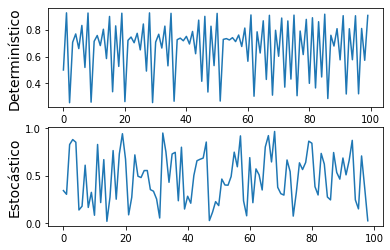

In [22]:
plt.subplot(211)
x = np.zeros((100,))
x[0] = 0.5
for i in range(1, x.shape[0]):
    x[i] = 3.7*x[i-1]*(1-x[i-1])
plt.plot(x)
plt.ylabel("Determinístico", fontsize=14)
plt.subplot(212)
x = pd.read_csv("suporte/random_signal.csv")
plt.plot(x)
plt.ylabel("Estocástico", fontsize=14)
plt.show()

_Notas sobre exemplos_: O gráfico do sinal determinístico foi gerado através de um [mapa logístico](https://pt.wikipedia.org/wiki/Mapa_logístico) e o gráfico do sinal estocástico foi gerado a partir de uma [sequência produzida](https://www.random.org/decimal-fractions/?num=100&dec=6&col=1&format=plain&rnd=date.2020-08-27) pelo site [Random.org](http://www.random.org) dedicado a produzir números aleatórios de alta qualidade.

- **Analógicos / Digitais**

  - Sinais **analógicos** são sinais gerados por sistemas naturais ou componentes eletrônicos cuja grandeza pode ser registrada por números reais. 
  
  - Sinais **digitais** são sinais que carregam informação binária, em geral gerados por sistemas computacionais.

(Analógico) ![Gramofone](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/VictorVPhonograph.jpg/186px-VictorVPhonograph.jpg) ![Ranhuras](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/SEM_vinyl_record.jpg/640px-SEM_vinyl_record.jpg)

(Digital) ![CD Player](https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/CDP101a.jpg/320px-CDP101a.jpg) ![Informação Digital](https://www.interaliamag.org/wp-content/uploads/2014/06/binary-code.jpg) ![Conversor D/A](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/8_bit_DAC.svg/395px-8_bit_DAC.svg.png)

Fonte das fotos: (i) Gramofone de cerca de 1907, por [Norman Bruderhofer]() com a licença de uso [CC BY-SA 2.5](https://creativecommons.org/licenses/by-sa/2.5); (ii) Imagem microscópica de um pedaço de disco vinil, por [Tbraunstein](https://commons.wikimedia.org/wiki/File:SEM_vinyl_record.jpg) com a licença de uso [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0); (iii) CD Player modelo Sony CDP101, por [Atreyu](https://commons.wikimedia.org/wiki/File:CDP101a.jpg) com a licença de uso [CC BY 3.0](https://creativecommons.org/licenses/by/3.0); Uns e Zeros, retirado do site Interalia Magazine, matéria [_Claude Shannon: A Bit more Information_](https://www.interaliamag.org/blog/claude-shannon-a-bit-more-information/); Esquema DAC 8 bits, por [Robert F Coughlin](https://commons.wikimedia.org/wiki/File:8_bit_DAC.svg), sob licensa livre para uso de qualquer propósito.

- Referente à **Energia / Potência**

  - Na área de processamento de sinais, a energia $\varepsilon_x$ de um sinal de tempo contínuo $x(t)$ é definida como a área sob a amplitude ao quadrado do sinal considerado, isto é, sua definição é:

    $\large \varepsilon_x \triangleq \displaystyle \int_{-\infty}^{+\infty} |x(t)|^2\, dt$

    A energia de um sinal medido em quantidades descritas em unidades S.I. possuem o valor equivalente em joules [J].

    Dessa forma, podemos ter casos onde a energia de um sinal pode ser **finita** ou **infinita**, tanto para $x(t)\in\mathbb{R}$ quanto para $x(t)\in\mathbb{C}$.
    
  - Potência é definida como a quantidade de energia consumida por unidade de tempo:
    
    $\large \mathcal{P}_x \triangleq \displaystyle\lim_{\tau \to \infty} \frac{1}{2\tau+1} \int_{-\tau}^{+\tau} |x(t)|^2\, dt$
  
    Esta quantidade é útil se a energia do sinal vai para o infinito ou se o sinal não for “quadrático não somável”. Então, temos formas onde a potência de um sinal pode ser **zero**, **finita** ou **infinita**.
    
      - **Sinal de energia** é um sinal com **energia finita** e, consequentemente, potência total igual a zero (duração infinita). Exemplo: um pulso isolado.

      - **Sinal de potência** é um sinal com **potência total finita** e diferente de zero. A energia do sinal de potência será infinita. Exemplo: sequências periódicas como uma senóide. Um sinal senoidal tem potência finita diferente de zero, mas energia infinita.

      - Um sinal pode **não ser um sinal de energia e um sinal de potência**, se ambas energia e potências forem infinitas. Assim, não pode ser classificado como sinal de energia ou como sinal de potência. Exemplo: $x[n] = n$.

## **Exemplos de sinais**

### Eletrocardiograma 

Sinal de um eletrocardiograma `MLII/1 NSR/100m (0).mat` da base de dados *ECG signals (1000 fragments)* disponível em: [DOI  10.17632/7dybx7wyfn.3](http://dx.doi.org/10.17632/7dybx7wyfn.3#file-26f8ae3f-f76f-4381-bce1-3674be0db98b)

> Sinal de natureza contínua (torna-se discreto quando da digitalização), aproximadamente periódico (idealmente), real, estocástico, sinal de potência (ao menos, durante a vida do paciente).

Sinal: [0.75634921 0.7547619  0.7531746  ... 0.74603175 0.7484127  0.74920635]


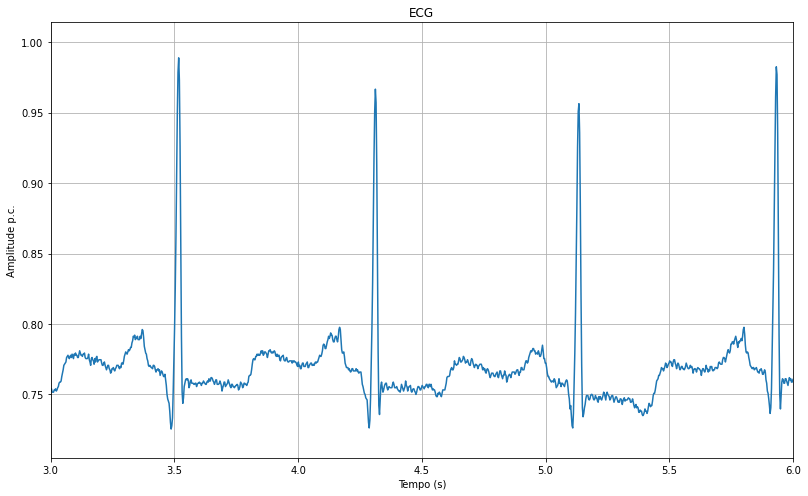

In [23]:
mat = scipy.io.loadmat('suporte/100m_0.mat')
fs = 360 #Hz
ecg = mat['val'][0]
ecg = ecg/max(ecg) # normalização
print(f"Sinal: {ecg}")
t = np.linspace(0, ecg.shape[0]/fs, ecg.shape[0])
plt.figure(figsize=graph_size(7))
plt.plot(t, ecg)
tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude p.c.', title='ECG', xlim=[3,6])
plt.grid('on')
plt.show()

### Ondas eletromagnéticas

Por exemplo, a radiação eletromagnética refere-se às ondas do campo eletromagnético que propagam através do espaço, carregando energia eletromagnética radiante. Inclui ondas de rádio, microondas, infravermelho, luz (visível), ultravioleta, raios X e raios gama.

> Sinal de natureza contínua (torna-se discreto quando da digitalização), periódico, complexo, determinístico (idealmente no vácuo), sinal de potência.

In [24]:
@interact(angle=(0,360), eletrica=True, magnetica=True, onda=True)
def electromagnetic_wave(eletrica, magnetica, onda, angle=290):
    fig = plt.figure(figsize=graph_size(14))
    ax = fig.gca(projection='3d')
    fx = lambda t: np.exp(1j*2*np.pi*500*1e12*t)
    x = np.linspace(0, 3/(500*1e12), 1000)
    ax.plot(x, np.zeros(x.shape), 'gray', label="Tempo (s)")
    if eletrica:
        ax.plot(x, np.zeros(x.shape), ':b', zs=np.imag(fx(x)), zdir='z', label="elétrica", linewidth=2)
    if magnetica:
        ax.plot(x, np.real(fx(x)), ':g', zs=np.zeros(x.shape), zdir='z', label="magnética", linewidth=2)
    if onda:
        ax.plot(x, np.real(fx(x)), zs=np.imag(fx(x)), zdir='z', label="onda", color='orange', linewidth=3)
    ax.legend(fontsize=14)
    plt.title("Onda eletromagnética percebida em um ponto no espaço (luz laranja, $\lambda \in [590,625]$ nm, $f \in [480,510]$ THz)", fontsize=14)
    ax.view_init(30, angle)
    plt.show()

interactive(children=(Checkbox(value=True, description='eletrica'), Checkbox(value=True, description='magnetic…

Animação de onda eletromagnética se deslocando no espaço, por [Fu-Kwun Hwang e Francisco Esquembre](https://commons.wikimedia.org/wiki/File:Electromagneticwave3D.gif), licença: [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0)

![Onda eletromagnética](https://upload.wikimedia.org/wikipedia/commons/4/4c/Electromagneticwave3D.gif)

### Séries Temporais

Sinal com registro de `total de casos de COVID-19 no Brasil por dia`, fonte: https://covid19br.wcota.me. Explicação disponível em: [DOI:10.1590/SciELOPreprints.362](https://doi.org/10.1590/SciELOPreprints.362). Arquivo `cases-brazil-cities-time.csv` disponível em: [wcota/covid19br](https://github.com/wcota/covid19br) (Acessado em 24/Ago/2020 às 15h00).

Sinal de natureza discreta, aperiódico, real, estocástico, sinal de energia.

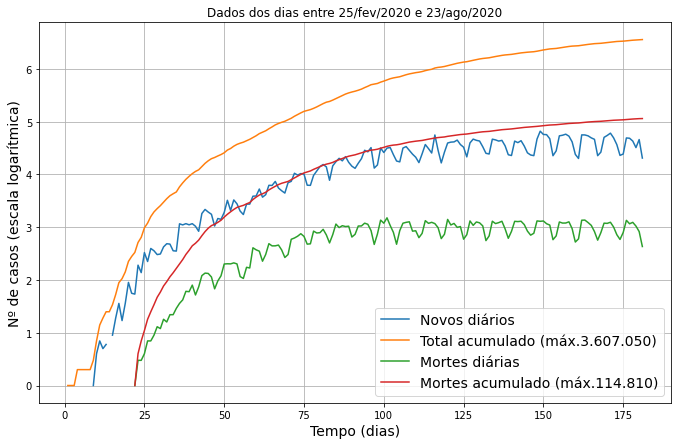

In [25]:
from warnings import catch_warnings, simplefilter
with catch_warnings(): # casos com valor zero geram 'warning' quando argumentos de log10
    simplefilter('ignore')
    dados = pd.read_csv('suporte/cases-brazil-cities-time.csv')
    totais = dados.loc[dados['state']=='TOTAL']
    datas = totais['date'].values
    n = np.linspace(1, datas.shape[0], datas.shape[0])
    casos_novos = totais['newCases'].values
    casos_totais = totais['totalCases'].values
    mortes_novos = totais['newDeaths'].values
    mortes_totais = totais['deaths'].values
    plt.figure(figsize=graph_size(7))
    plt.plot(n, np.log10(casos_novos), label='Novos diários')
    plt.plot(n, np.log10(casos_totais), label='Total acumulado (máx.3.607.050)')
    plt.plot(n, np.log10(mortes_novos), label='Mortes diárias')
    plt.plot(n, np.log10(mortes_totais), label='Mortes acumulado (máx.114.810)')
    plt.xlabel('Tempo (dias)', fontsize=14)
    plt.ylabel('Nº de casos (escala logarítmica)', fontsize=14)
    plt.legend(fontsize=14)
    plt.title('Dados dos dias entre 25/fev/2020 e 23/ago/2020')
    plt.grid('on')
    plt.show()

---
---

# **Aula 01b: Introdução a sinais de áudio**

## **Exemplos de sinais de áudio**

### Cantor

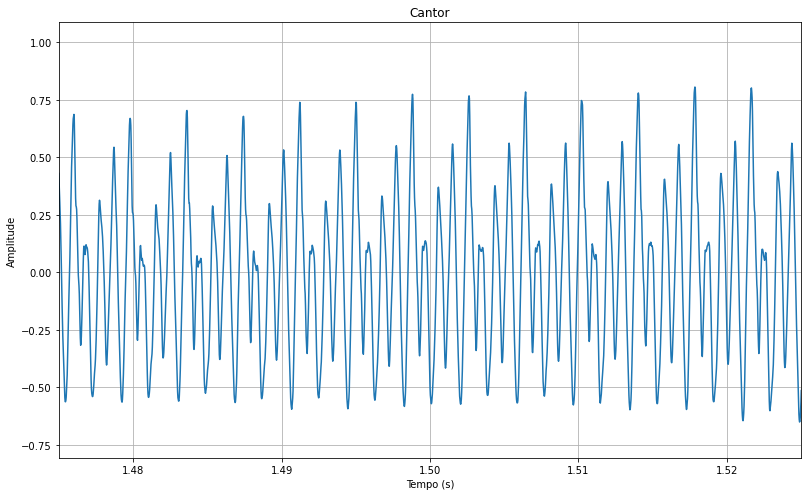

In [27]:
sing = tdsp.read_wave('suporte/156553__davidkyoku__singing-one-note.wav')
sing = sing.segment(start=1, duration=1)
sing.normalize() # escala o sinal para ficar com o máximo <= 1 e mínimo >= -1
plt.figure(figsize=graph_size(7))
sing.plot()
tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude', title='Cantor', xlim=[1.475,1.525])
plt.grid('on')
sing.make_audio()

### Piano

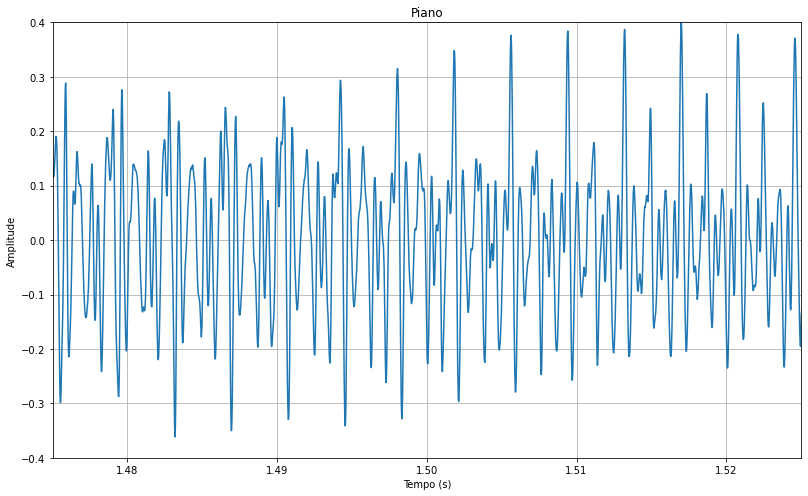

In [28]:
piano = tdsp.read_wave('suporte/469648__tarane468__005-c3.wav') 
piano = piano.segment(start=1, duration=1)
piano.normalize() # escala o sinal para ficar com o máximo <= 1 e mínimo >= -1
plt.figure(figsize=graph_size(7))
piano.plot()
tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude', title='Piano', xlim=[1.475,1.525], ylim=[-0.4,0.4])
plt.grid('on')
piano.make_audio()

### Saxofone

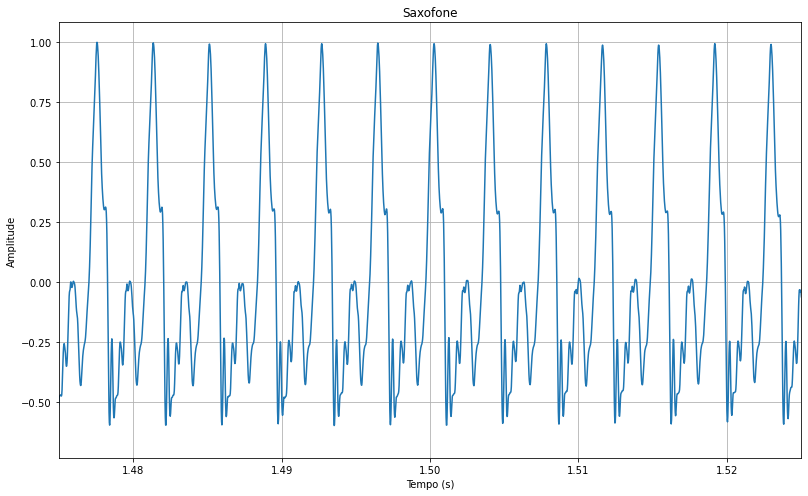

In [29]:
sax = tdsp.read_wave('suporte/358388__mtg__sax-alto-c4.wav')
sax = sax.segment(start=1, duration=1)
sax.normalize()
plt.figure(figsize=graph_size(7))
sax.plot()
tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude', title='Saxofone', xlim=[1.475,1.525])
plt.grid('on')
sax.make_audio()

### Tom, nota $C_4$

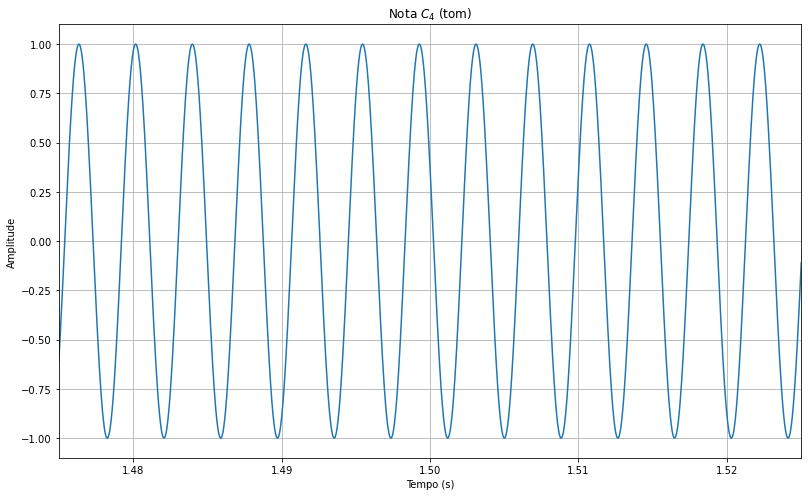

In [30]:
c_tone = tdsp.SinSignal(freq=261.626, amp=1, offset=0).make_wave(start=1, duration=1, framerate=44100)
plt.figure(figsize=graph_size(7))
c_tone.plot()
tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude', title=r'Nota $C_4$ (tom)', xlim=[1.475,1.525])
plt.grid('on')
c_tone.make_audio()

## **Comparação dos sinais**

Todos são expressões sonoras da nota Nota C<sub>4</sub> (C central), tom com frequência de 261.626 Hz. Mas, no que são similares?

### No _domínio do tempo_

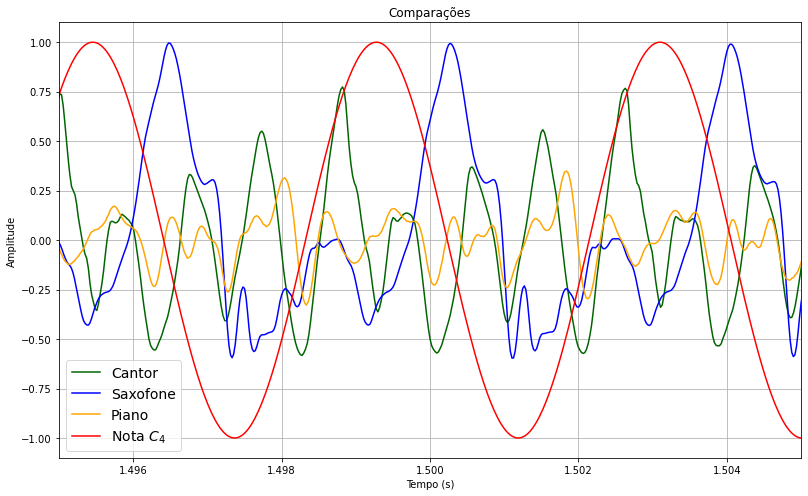

In [31]:
plt.figure(figsize=graph_size(7))
sing.plot(color='darkgreen', label='Cantor')
sax.plot(color='b', label='Saxofone')
piano.plot(color='orange', label='Piano')
c_tone.plot(color='r', label=r'Nota $C_4$')
tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude', title='Comparações', xlim=[1.495,1.505])
plt.legend(fontsize=14)
plt.grid('on')
plt.show()

### No _domínio da frequência_

In [32]:
@interact(
    sing=fixed(sing), 
    piano=fixed(piano), 
    sax=fixed(sax), 
    c_tone=fixed(c_tone),
    _cantor=True, _piano=True, _sax=True, _nota_C=True, 
    f_inicio=(0, 6000, 50), 
    f_fim=(0, 6000, 50),
)
def zoom_spectrum(sing, piano, sax, c_tone, _cantor, _piano, _sax, _nota_C, f_inicio=0, f_fim=10000):
    if f_inicio == f_fim:
        if f_fim > 50:
            f_inicio -= 50
        else:
            f_fim += 50
    plt.figure(figsize=graph_size(7))
    if _cantor:
        spectrum = sing.make_spectrum()
        spectrum.scale(1/len(spectrum))
        spectrum.plot(label='Cantor')
    if _piano:
        spectrum = piano.make_spectrum()
        spectrum.scale(1/len(spectrum))
        spectrum.plot(label='Piano')
    if _sax:
        spectrum = sax.make_spectrum()
        spectrum.scale(1/len(spectrum))
        spectrum.plot(label='Sax')
    if _nota_C:
        spectrum = c_tone.make_spectrum()
        spectrum.scale(1/len(spectrum))
        spectrum.plot(label=r'Nota $C_4$')
    tdsp.decorate(xlabel='Frequência (Hz)', title='Espectros de frequência', ylim=[0,0.4], 
                xlim=[min(f_inicio,f_fim), max(f_inicio,f_fim)])
    if _cantor or _piano or _sax or _nota_C:
        plt.legend(fontsize=14)
    plt.grid('on')
    plt.show()

interactive(children=(Checkbox(value=True, description='_cantor'), Checkbox(value=True, description='_piano'),…

### Frequência Fundamental no áudio

A frequência natural, ou frequência fundamental, muitas vezes referida simplesmente como fundamental, é definida como a **frequência mais baixa** (significativa) de uma forma de onda **periódica**. Na música, a fundamental é o tom musical de uma nota que é percebida como o presente parcial mais grave.

---

## **CURIOSIDADE: _"Teste" sua audição_**

**Aviso**: o código interpretável a seguir não substitui o exame apropriado conduzido por um médico especialista. Este é só um exercício de programação projetado para uma interação significativa com o usuário. 

Como aproximação, temos que nos seres humanos, a cóclea permite, com um poder de discriminação de 3 Hz a 1.000 Hz, **ouvir sons de _20 Hz a 20.000 Hz_**, ou aproximadamente 10 oitavas. Nossos ouvidos são mais sensitivos às frequências no intervalo de 2.000 a 5.000 Hz, mas nosso alcance auditivo costuma piorar com a idade, normalmente mais rapidamente para homens do que para mulheres. As pessoas podem perder a capacidade de ouvir altas frequências à medida que envelhecem.

Com o auxílio de um fone de ouvido, use a interface a seguir para variar a frequência do tom gerado e verificar quais os seus "limites" de audição.

In [33]:
@interact(frequencia=(10, 22000, 10))
def tone(frequencia=8000):
    sound = tdsp.SinSignal(freq=frequencia, amp=1, offset=0).make_wave(duration=1, framerate=256000)
    sound.apodize() # Aplica "fade in" e "fade out" ao sinal (elimina cliques do início e do final do áudio)
    spectrum = sound.make_spectrum()
    spectrum.scale(1/len(sound))
    plt.figure(figsize=graph_size(7))
    plt.subplot(211)
    sound.plot() 
    tdsp.decorate(xlabel='Tempo (s)', xlim=[0.4995,0.5005])
    plt.grid('on')
    plt.subplot(212)
    spectrum.plot() 
    tdsp.decorate(xlabel='Frequência (Hz)', xlim=[20,20000])
    plt.grid('on')
    plt.show()
    display(sound.make_audio())

interactive(children=(IntSlider(value=8000, description='frequencia', max=22000, min=10, step=10), Output()), …

### Um pouco de anatomia

A cóclea é responsável pela função auditiva. Localiza-se no ouvido interno e é uma cavidade no labirinto ósseo em forma de espiral. As células nervosas da cóclea localizadas na região basal enviam informações sonoras de frequência aguda para o cérebro enquanto as células da região apical enviam as de frequência grave.

Anatomia do ouvido, por [Zina Deretsky (National Science Foundation)](https://commons.wikimedia.org/wiki/File:Hearing_mechanics.jpg), domínio público:

![Hearing mechanics.jpg 566 × 599 pixels](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Hearing_mechanics.jpg/566px-Hearing_mechanics.jpg) 

Distribuição de frequências na cóclea, retirado de site da [MED-EL](https://www.medel.com/int/show2/index/id/1361/title/Complete-Cochlear-Coverage/):

![](https://s3.medel.com/images/triformance/tonotopic-principal-of-the-cochlea.jpg)

### Dica de Vídeo

![youtube](YouTube-icon-pq.png) [Journey of Sound to the Brain](https://www.youtube.com/watch?v=eQEaiZ2j9oc) (áudio em inglês, com possibilidade de legenda em inglês)

### Informação extra

Para a área de reconhecimento de voz, o espectro ordinário do sinal de áudio, por sua característica de distribuição linear, não é representativo da audição humana. Os pesquisadores tentam emular a resposta da cóclea humana às frequências auditivas, processando o espectro do sinal de áudio capturado para obter coeficientes como os MFCCs ([_Mel-frequency cepstral coefficients_](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), em inglês) ou os CFCCs ([_cochlear filter cepstral coefficients_](https://ieeexplore.ieee.org/document/5672773), em inglês). Em geral, esses coeficientes são pré-processados e utilizados como parte da entrada de sistemas de aprendizagem de máquina.

---
---

# **Aula 01c: Amostragem, Métricas, Operações e Sinusóides**

## **Amostragem de sinais**

Para a área de processamento de sinais, _amostragem_ é o processo de redução de um sinal de tempo contínuo para um sinal de tempo discreto. Um exemplo comum é a conversão de uma onda sonora (um sinal contínuo) em uma sequência de valores ou amostras (um sinal de tempo discreto).

Uma _amostra_ é um valor ou conjunto de valores em um ponto no tempo ou espaço. Um amostrador é um subsistema ou operação que extrai amostras de um sinal contínuo. Um amostrador ideal teórico produz amostras equivalentes ao valor instantâneo do sinal contínuo nos pontos desejados.

Note que o sinal original é recuperável de uma sequência de amostras, até o limite de Nyquist (a seguir), passando a sequência de amostras por algum tipo de filtro passa-baixa ou de reconstrução.

In [35]:
@interact(freq_amostragem=(50,5000,10))
def sampling1(freq_amostragem=1000):
    tmax_show=0.05
    omega = lambda f: 2*np.pi*f
    fx = lambda x: np.cos(omega(100)*x) + np.cos(omega(110)*x) + np.cos(omega(250)*x) + np.cos(omega(400)*x)
    x = np.linspace(0, 1, freq_amostragem)
    y = fx(x)
    xo = np.linspace(0, tmax_show, 1000)
    plt.figure(figsize=graph_size(7))
    plt.plot(xo, fx(xo), 'r', label='original')
    plt.stem(x, y, basefmt='gray', label='amostras',use_line_collection=True)
    plt.plot(x, y, '-.k', label='reconstituído (linear)')
    plt.annotate(f"   Nº de pontos em 1seg: {y.shape[0]} ou {y.shape[0]*8:0.1e} bytes", (0, -4), fontsize=14)
    plt.fill_between(x, y, color='gray')
    tdsp.decorate(xlabel='Tempo (s)', xlim=[0,tmax_show])
    plt.grid('on')
    plt.legend(fontsize=14)
    plt.show()
    

interactive(children=(IntSlider(value=1000, description='freq_amostragem', max=5000, min=50, step=10), Output(…

### Teorema da amostragem

O *teorema da amostragem de Nyquist-Shannon*, também conhecido simplesmente como teorema de Nyquist, é fundamental no campo da teoria da informação, particularmente na área de telecomunicações e processamento de sinais. Amostrar é o processo no qual se converte um sinal (por exemplo, uma função contínua no tempo ou espaço) em uma sequência numérica (uma função discreta no tempo ou espaço). 

Nomeado após [Harry Nyquist](https://pt.wikipedia.org/wiki/Harry_Nyquist), que determinou a relação limitante entre o número de pulsos independentes de um canal telegráfico e a largura de banda do canal, e [Claude Shannon](https://pt.wikipedia.org/wiki/Claude_Shannon) que avançou esses estudos, culminando na formulação da teoria da informação.

A versão de Shannon do teorema é (tradução livre):

> Se uma função $x(t)$ contém frequências não maiores do que $B$ Hz, a mesma é completamente determinada ao se tomar como ordenadas uma série de pontos igualmente espaçados por $\displaystyle\frac{1}{2B}$ segundos.

Em outras palavras, devemos considerar a maior frequência significativa contida em um sinal para determinar a frequência de amostragem apropriada, _no mínimo duas vezes essa frequência_ (grandeza conhecida como _limite de Nyquist_), a fim de garantir a representatividade desse sinal.

In [37]:
@interact(freq_amostragem=(50,5000,10))
def sampling2(freq_amostragem=1000):
    tmax_show=0.05
    omega = lambda f: 2*np.pi*f
    fx = lambda x: np.cos(omega(100)*x) + np.cos(omega(110)*x) + np.cos(omega(250)*x) + np.cos(omega(400)*x)
    x = np.linspace(0, 1, freq_amostragem)
    xo = np.linspace(0, tmax_show, 1000)
    N = x.shape[0]
    spectrum = (np.fft.fft(fx(x))/N*2)
    freq = np.fft.fftfreq(spectrum.shape[0], d=1/freq_amostragem)
    plt.figure(figsize=graph_size(7))
    plt.subplot(211)
    plt.stem(x, fx(x), basefmt='gray', use_line_collection=True) 
    plt.plot(xo, fx(xo), ':r', linewidth=2) 
    tdsp.decorate(xlabel='Tempo (s)', xlim=[0,tmax_show])
    plt.grid('on')
    plt.subplot(212)
    plt.plot(freq[0:N//2], np.real(spectrum)[0:N//2])
    tdsp.decorate(xlabel='Frequência (Hz)', xlim=[0,500])
    plt.grid('on')
    plt.show()

interactive(children=(IntSlider(value=1000, description='freq_amostragem', max=5000, min=50, step=10), Output(…

### Frequência de amostragem para áudio

A taxa de amostragem (ou frequência de amostragem) é medida em hertz (Hz). De acordo com o teorema de amostragem, a frequência de amostragem para produzir a forma de onda original deve ser o dobro da frequência representativa máxima do sinal. Como a largura de banda para audição humana é de 20 Hz a 20 kHz, a taxa de amostragem de áudio deve estar idealmente acima de 40 kHz (geralmente 44,1 KHz).

Para conhecer mais taxas de amostragem comerciais para áudio, tem uma [tabela com usos na Wikipedia sob o vocábulo _Sampling_](https://en.wikipedia.org/wiki/Sampling_(signal_processing)#Sampling_rate) (em inglês). Note a relativamente baixa taxa de 8 kHz usada para telefones, walkie-talkies, etc que é adequada para fala humana, mas que descarta [sibilâncias](https://pt.wikipedia.org/wiki/Sibilante); em português, temos os sons sibilantes [s] de **s**oar, [z] de **z**oar, [ʃ] de **ch**ato e [ʒ] de **j**ato (um dos motivos da criação do [alfabeto fonético da OTAN](https://pt.wikipedia.org/wiki/Alfabeto_fonético_da_OTAN)).

## **Métricas de um sinal discreto real ou complexo**

Em processamento de sinais, um sinal é normalmente entendido como em função do tempo. O termo **tamanho** de um sinal é usado para representar a "força" do mesmo. É fundamental saber o tamanho de um sinal para determinadas aplicações. Por exemplo, podemos estar interessados em saber a quantidade de eletricidade necessária para alimentar um [servo motor](https://create.arduino.cc/projecthub/arcaegecengiz/how-to-use-servo-motors-with-arduino-b02bed) em vez de um [motor elétrico de 10 HP](http://www.techtopind.com/motors/GR3-CI-TF-215T-4-B-D-10). Ambas as aplicações são diferentes e têm tolerâncias diferentes.

- **Média** (amostral)

  $\large \mu_x \triangleq \displaystyle\frac{1}{N}\,\displaystyle\sum_{n=0}^{N-1} x_n$

  Quando aplicada a uma função periódica no domínio do tempo, descreve a componente contínua (_aka_ polarização CC, deslocamento CC, coeficiente CC) da forma de onda. Na área de áudio, por exemplo, uma componente contínua diferente de zero é uma característica indesejável da gravação de um som. É comum subtrair a média de um sinal antes e processá-lo.

- **Energia total**

  $\large \varepsilon_x \triangleq \displaystyle\sum_{n=-\infty}^{+\infty} |x_n|^2$

  É uma medida da força do sinal. Esta definição pode ser aplicada a qualquer sinal, independentemente de ele possuir energia real (uma propriedade quantitativa básica conforme descrito pela física) ou não. Se o sinal estiver associado a alguma energia física, a definição acima fornece o conteúdo de energia do sinal em joules. Como sua definição teórica requer um domínio infinito, na prática só é calculada em cima do sinal capturado, se um sinal de energia, ou para tirar a média, uma estimativa da potência.

- **Potência média**
  
  $\large \mathcal{P}_x \triangleq \displaystyle\frac{\varepsilon_x}{N} = \displaystyle\frac{1}{N}\,\displaystyle\sum_{n=0}^{N-1} |x_n|^2$

  Como potência é definida como a quantidade de energia consumida por unidade de tempo (em unidades SI, watts), usamos a média do cálculo de energia para o sinal, em especial os sinais de potência. Na prática, não podemos detectar potência zero ou infinita em um sinal capturado, mas a métrica é sempre factível.

- **Valor eficaz** (raiz do valor quadrático médio ou RMS)

  $\large x_\mathrm{RMS} \triangleq \sqrt{\mathcal{P}_x} = \sqrt{\displaystyle\frac{1}{N}\,\displaystyle\sum_{n=0}^{N-1} |x_n|^2}$

  Quando aplicado a tensões e correntes, o valor RMS de uma grandeza alternada é o equivalente dessa mesma grandeza contínua. Portanto, é também uma medida do conteúdo de energia em um determinado sinal. Em estatística, para qualquer sinal estacionário aleatório de média zero, o valor RMS é igual ao desvio padrão do sinal. Quando dois sinais não correlacionados (ou ortogonais) são somados, como ruído de duas fontes independentes, o valor RMS de sua soma é igual à raiz quadrada da soma do quadrado de seus valores RMS individuais.

- **Variância / desvio-padrão** (amostral)

  $\large \sigma_x^2 \triangleq \displaystyle\frac{1}{N}\,\displaystyle\sum_{n=0}^{N-1} |x_n - \mu_x|^2$; note que para sinais reais: $\large \sigma_x^2 = \mathcal{P}_x - \mu_x^2$
  
  $\large \sigma_x \triangleq \sqrt{\sigma_x^2}$
  
  Podemos descrever a variância $\sigma_x^2$ como a potência média dos desvios aleatórios do sinal expressos como potência e o desvio padrão $\sigma_x$, essa potência média expressa como amplitude. A variância e o desvio padrão expressam as mesmas informações de maneiras diferentes. Embora alguns entendam a variância como mais conveniente em certas situações analíticas, o desvio padrão é um número que pode ser interpretado diretamente como uma medida da tendência de um sinal de se desviar da média.

- **Relação sinal-ruído** (signal to noise ratio - SNR)
  
  $\large \displaystyle\frac{\mathcal{P}_\mathrm{sinal}}{\mathcal{P}_\mathrm{ruído}}$

  Para obtenção da relação sinal-ruído, tanto o sinal desejado quanto o ruído aparecem no mesmo ponto em um sistema e precisam ser medidos na mesma impedância.

In [5]:
@interact(funcao=(1,4,1), N=(50,750,50))
def metrics(funcao=1, N=50):
    def unit_step(t):
        return 1 * (t >= 0)
    if funcao == 1:
        fx = lambda x : np.exp(-x)*np.cos(2*np.pi*x)*unit_step(x) + np.exp(x)*np.cos(2*np.pi*(-x))*unit_step(-x)
    elif funcao == 2:
        fx = lambda x : np.cos(2*np.pi*x)
    elif funcao == 3:
        fx = lambda x : 2*np.random.random(x.shape) - 1
    elif funcao == 4:
        fx = lambda x : np.exp(-0.5*x**2/(0.1**2))
    x = np.linspace(-3, 3, N)
    y = fx(x)
    e = np.sum(np.abs(y)**2)
    p = e/N
    r = np.sqrt(p)
    m = np.sum(y)/N
    dp = np.sqrt(np.sum(np.abs(y-m)**2)/N)
    print(f"Energia: {e:0.4g}; Potência: {p:0.4g}; RMS: {r:0.4g}; Média: {m:0.4g}; Desvio-padrão: {dp:0.4g}")
    plt.figure(figsize=graph_size(7))
    plt.stem(x, y, basefmt='gray',use_line_collection=True)
    plt.plot(x, y, '-.r', linewidth=2)
    plt.show()

interactive(children=(IntSlider(value=1, description='funcao', max=4, min=1), IntSlider(value=50, description=…

## **Operações com sinais**

Ao alterarmos a variável independente na função geradora do sinal, alteramos o comportamento do sinal.

I. **Deslocamento**

Para deslocar o sinal no tempo de k unidades, basta transformar $t \rightarrow t - k$. Se $k > 0$, o sinal se atrasa; se $k < 0$ o sinal se adianta com relação à referência (sinal original).

II. **Escalonamento**

Para escalonar o sinal, basta transformar $t \rightarrow \alpha \cdot t$. Para "estender"o sinal, use $|\alpha| > 1$; para "comprimir", use $|\alpha| < 1$.

III. **Reflexão no tempo**

Para refletir o sinal no tempo, basta transformar $t \rightarrow -t$.

In [6]:
@interact(
    k=(-3,3,1),
    alpha=(0.1,5,0.1),
    refletir=False,
)
def signal(k=0, alpha=1, refletir=False):
    def unit_step(t):
        return 1 * (t >= 0)
    fx = lambda x : np.exp(-x)*np.cos(2*np.pi*x)*unit_step(x)
    x = np.linspace(-6, 6, 1000)
    plt.figure(figsize=graph_size(7))
    ax = plt.axes()
    ax.axhline(y=0, color='gray')
    ax.axvline(x=0, color='gray')
    r = -1 if refletir else 1
    plt.plot(x, fx(alpha*(r*x-k))) # <=== operando a variável independente (e.g.tempo)
    tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude', xlim=[-3, 6])
    plt.grid('on')

interactive(children=(IntSlider(value=0, description='k', max=3, min=-3), FloatSlider(value=1.0, description='…

## **Onda senoidal, constituinte de sinais**

Joseph Fourier (1768-1830) foi o matemático que  aplicou o conceito de simplificação de sinais em uma série de funções senoidais em seu estudo das propriedades de transferência de calor no século XIX. As primeiras ideias de decompor uma função periódica na soma de funções oscilantes simples já apareciam desde o século 3 aC, quando os astrônomos antigos propuseram um modelo empírico de movimentos planetários. Mas foi através da pesquisa de Fourier que foi estabelecido o fato de que uma função arbitrária (contínua) poder ser representada por uma série trigonométrica (intrinsicamente periódica).

Como exemplo, podemos ver a "formação" de uma onda quadrada:

In [41]:
@interact(n_senos=(1,50,1))
def onda_quadrada(n_senos=1):
    a_sine = lambda k, t: np.sin(2*np.pi*(2*k-1)*t)/(2*k-1)
    t = np.linspace(0, 2, 1000)
    sqw = np.zeros(t.shape)
    for i in range(1, n_senos+1):
        sqw += a_sine(i, t)
    sqw *= 4/np.pi
    plt.plot(t, sqw)
    plt.show()

interactive(children=(IntSlider(value=1, description='n_senos', max=50, min=1), Output()), _dom_classes=('widg…

### Definição matemática

Uma onda senoidal ou sinusóide é uma curva matemática que descreve uma oscilação periódica suave. É nomeada por conta da função seno. Uma onda senoidal é uma onda contínua e ocorre frequentemente em problemas na matemática pura e aplicada, na física, engenharia, processamento de sinais e muitos outros campos. Sua forma mais básica em função do tempo ($t$) é:

$\large y(t) = A\,\sin(2\pi\,f\,t+\phi) = A\,\sin(\omega\,t+\phi)$

Onde:
- $A$ é amplitude (unidade depende da grandeza medida), o desvio de zero do pico da função.
- $f$ é frequência (em _Hz_), o número de oscilações (ciclos) que ocorrem a cada segundo de tempo.
- $\omega = 2\pi\,f$ é frequência angular (em _rad/s_), a taxa de mudança do argumento da função em unidades de radianos por segundo
- $\phi$ é fase (em _rad_), especifica onde no ciclo a oscilação está em $t = 0$.
Quando $\phi$ é diferente de zero, toda a forma de onda parece ser deslocada no tempo pela quantidade de $\large\,^\phi\!/_\omega$ segundos. Um valor negativo representa um atraso e um valor positivo representa um avanço.

Uma onda senoidal amortecida ou sinusóide amortecida é uma função sinusoidal cuja amplitude se aproxima de zero à medida que o tempo aumenta. Ondas senoidais amortecidas são comumente vistas na ciência e na engenharia, sempre que um oscilador harmônico está perdendo energia mais rápido do que está sendo fornecido. Sua forma em função do tempo ($t$) é bastante similar à forma básica anterior:

$\large y(t) = A\,\exp(-\lambda\,t)\,\sin(2\pi\,f\,t+\phi) = A\,\exp(-\lambda\,t)\,\sin(\omega\,t+\phi)$

Onde:
- $\lambda$ é a constante de decaimento (em _s<sup>-1</sup>_).

In [42]:
@interact(
    amplitude=(0,1,0.1), 
    decaimento=(0,100,1), 
    frequencia=(1,100,1), 
    fator_fase=(-8,8,1),
    ver_n_ciclos=(1, 10, 1), 
    ver_1seg=False,
)
def sinusoid(amplitude=1, decaimento=0, frequencia=60, fator_fase=0,  ver_1seg=False, ver_n_ciclos=10):
    sx = lambda t: amplitude*np.exp(-decaimento*t)*np.cos(2*np.pi*frequencia*t + fator_fase*np.pi/4)
    lim_t = 1 if ver_1seg else ver_n_ciclos/frequencia
    t = np.linspace(0, lim_t, 10000)
    plt.figure(figsize=graph_size(7))
    plt.plot(t, sx(t))
    if decaimento > 0:
        plt.plot(t, amplitude*np.exp(-decaimento*t), ':y')
        plt.plot(t, -amplitude*np.exp(-decaimento*t), ':y')
    plt.annotate(f'  fase = {fator_fase/4:g}⋅π rad = {fator_fase*np.pi/4:.3f} rad', (0,-0.95), fontsize=14)
    tdsp.decorate(xlabel='Tempo (s)', ylabel='Amplitude', title="Sinusóide", xlim=[0, np.max(t)], ylim=[-1, 1])
    plt.grid('on')
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=1.0), IntSlider(value=0, description…

---
---

# **Aula 01d: Complexos, Euler e Fourier**

## **Números complexos**

Números complexos em sua forma _retangular_: 

$\large z = a + i\,b = a + j\,b = (a, b)$

Onde:
- $z$ é um número complexo
- $a$ é a parte real de $z$
- $b$ é a parte imaginária de $z$
- $i=j=\sqrt(-1)$ é a unidade imaginária

Números complexos em sua forma _polar_: 

$\large z = |z|\angle\theta = |z|e^{-i\,\theta} = |z|\exp(-j\,\theta)$

Onde:
- $|z|$ é o módulo (ou magnitude) de $z$
- $\theta$ é o argumento (ou ângulo) de $z$

In [43]:
@interact(a=(-5,5,0.5), b=(-5,5,0.5), polar=False, mag=(0,5,0.5), deg=(0, 360, 1), conjugado=False)
def complex_number(a=5, b=5, polar=False, mag=5, deg=45, conjugado=False):
    if polar:
        a = mag*np.cos(deg/180*np.pi)
        b = mag*np.sin(deg/180*np.pi)
    if conjugado:
        b = -b
    plt.figure(figsize=(7, 7))
    ax = plt.axes()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.set_aspect('equal')
    plt.xlabel('R', horizontalalignment='right', x=1.0)
    plt.ylabel('Im', horizontalalignment='right', y=1.0)
    plt.grid('on')
    plt.plot([0,a], [0,b], 'orange')
    plt.plot([a,a], [0,b], ':k')
    plt.plot([0,a], [b,b], ':k')
    plt.scatter(a,b,100,marker='*',c='r')
    plt.scatter(a,0,25,marker='.',c='k')
    plt.scatter(0,b,25,marker='.',c='k')
    plt.annotate(f" ({a:.3f}, {b:.3f})", (a,b), fontsize=14)
    plt.xlim((-6, 6))
    plt.ylim((-6, 6))
    plt.show()

interactive(children=(FloatSlider(value=5.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

## **Fórmula de Euler**

A fórmula de Euler, em homenagem a [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler), é uma fórmula matemática em análise complexa que estabelece a relação fundamental entre as funções trigonométricas e a função exponencial complexa. A fórmula de Euler afirma que para qualquer $x \in \mathbb{R}$:

$\large e^{ix} = \cos x + i\sin x$

Note que $e^{ix} = 1\cdot e^{ix} = 1\,\angle x = \cos x + i\sin x$, onde $\cos x$ é a parte real e $\sin x$ a parte imaginária do número complexo.

As funções trigonométricas podem ser escritas como:

- $\large \cos x = \mathrm{Re}(e^{ix}) = \dfrac{e^{ix} + e^{-ix}}{2}$

In [46]:
@interact(eix=True, expr=True)
def cos_signal(eix, expr):
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    plt.figure(figsize=graph_size(7))
    ax = plt.axes()
    ax.axhline(y=0, color='gray')
    ax.axvline(x=0, color='gray')
    plt.plot(x, np.cos(x), 'y', label='cos')
    if eix:
        plt.plot(x, np.real(np.exp(1j*x)), '-.b', label='$e^{ix}$')
    if expr:
        plt.plot(x, np.real((np.exp(1j*x) + np.exp(-1j*x))/2), ':r', label='$\dfrac{e^{ix} + e^{-ix}}{2}$') # necessário eliminar 'resíduo' imaginário
    plt.grid('on')
    plt.legend(fontsize=14)
    plt.show()

interactive(children=(Checkbox(value=True, description='eix'), Checkbox(value=True, description='expr'), Outpu…

- $\large \sin x = \mathrm{Im}(e^{ix}) = \dfrac{e^{ix} - e^{-ix}}{2i}$

In [47]:
@interact(eix=True, expr=True)
def sin_signal(eix, expr):
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    plt.figure(figsize=graph_size(7))
    ax = plt.axes()
    ax.axhline(y=0, color='gray')
    ax.axvline(x=0, color='gray')
    plt.plot(x, np.sin(x), 'y', label='sin')
    if eix:
        plt.plot(x, np.imag(np.exp(1j*x)), '-.b', label='$e^{ix}$')
    if expr:
        plt.plot(x, np.real((np.exp(1j*x) - np.exp(-1j*x))/(2*1j)), ':r', label='$\dfrac{e^{ix} - e^{-ix}}{2i}$') # necessário eliminar 'resíduo' imaginário
    plt.grid('on')
    plt.legend(fontsize=14)
    plt.show()

interactive(children=(Checkbox(value=True, description='eix'), Checkbox(value=True, description='expr'), Outpu…

## **Onda sinusoidal complexa**

A onda sinusoidal complexa é definida como:

$\large s(t) \triangleq A\, e^{j(\omega\,t + \phi)} = A\cos(\omega\,t + \phi) + j\,A\sin(\omega\,t + \phi)$, onde $\omega = 2\pi f$.

Assim, uma sinusoidal complexa consiste em um componente _em fase_ para sua parte real e um componente em _quadratura de fase_<sup>+</sup> para sua parte imaginária. 
Ou seja, tem um módulo constante (ou seja, uma magnitude complexa constante) igual a $|s(t)| = A$ e uma fase instantânea igual a $\angle s(t) = \omega\,t + \phi$.

A frequência instantânea é obtida com a derivada da fase instantânea: $\frac{d}{dt} \angle s(t) = \omega = 2\pi f$

Como o módulo da onda sinusoidal complexa é constante, deve estar em um círculo no plano complexo:
- Podemos verificar que $x(t) = e^{j\omega t}$ traça o movimento circular no sentido _anti-horário_ ao longo do círculo unitário no plano complexo conforme $t$ aumenta. Chamamos esse tipo de onda de "senoide de _freqüência positiva_" para $\omega > 0$.
- Enquanto isso, seu conjugado $\overline {x (t)} = e^{- j\omega t}$ possui movimento circular no sentido _horário_. Da mesma forma, esse tipo de onda, para $\omega > 0$, é chamada de senoide de _frequência negativa_. 
Observe que uma onda sinusoidal de frequência positiva ou negativa é necessariamente complexa.

(<sup>+</sup>) 90° fora de fase, ou seja, uma mudança de fase relativa de $\pm \frac{\pi}{2}$.

Podemos ainda definir sua versão amortecida como:

$\large s(t) \triangleq A\, e^{-\lambda\,t}\, e^{j(\omega\,t + \phi)}$, onde $\lambda \in \mathbb{R}$

Para saber mais, acesse (em inglês): _Mathematics of the DFT_ de Julius O. Smith III, no [capítulo _Complex Sinusoids_](https://www.dsprelated.com/freebooks/mdft/Complex_Sinusoids.html).

In [62]:
@interact(amplitude=fixed(1), frequencia=(-10,10,1), fator_fase=(-8,8,1), decaimento=(0,10,1),
          real=True, imag=True, onda=True)
def sin_complex(amplitude, frequencia=1, fator_fase=0, decaimento=0, real=True, imag=True, onda=True):
    fig = plt.figure(figsize=graph_size(8))
    ax = fig.gca(projection='3d')
    fx = lambda t: amplitude*np.exp(-decaimento*t)*np.exp(1j*(2*np.pi*frequencia*t + fator_fase*np.pi/4))
    x = np.linspace(0, 1, 1000)
    ax.plot([0, 1], [0, 0], zs=[0, 0], zdir='z', color='gray')
    ax.plot([0, 0], [-1, 1], zs=[0, 0], zdir='z', color='gray')
    ax.plot([0, 0], [0, 0], zs=[-1, 1], zdir='z', color='gray')
    if real:
        ax.plot(x, np.real(fx(x)), zs=np.zeros(x.shape), zdir='z', color='g')
    if imag:
        ax.plot(x, np.zeros(x.shape), zs=np.imag(fx(x)), zdir='z', color='b')
    if onda:
        ax.plot(x, np.real(fx(x)), zs=np.imag(fx(x)), zdir='z', color='r')
    plt.show()

interactive(children=(IntSlider(value=1, description='frequencia', max=10, min=-10), IntSlider(value=0, descri…

## **Explorando a Transformada de Fourier**

Hoje, a análise de Fourier está embutida em muitos aspectos de nossa vida cotidiana. Do reconhecimento de voz, comunicação de áudio e funções de processamento de imagem integrantes de nossa experiência digital moderna (basta olhar para o seu smartphone), até a sismologia, oceanografia e cristalografia de raios-x. Também pode ser usada para calcular a potência (também conhecida como a tendência de aparecer nos dados) de todos os ciclos possíveis em uma série temporal, ou mesmo detectar ruídos em imagens de telescópios e satélites.

### Abstração para visualização

![Transformada de Fourier](https://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif)

Animação por [Lucas V. Barbosa](https://commons.wikimedia.org/wiki/File:Fourier_series_and_transform.gif) com a licença [CC-0](https://creativecommons.org/publicdomain/zero/1.0).

A motivação para a transformada de Fourier vem do estudo das séries de Fourier. No estudo da série de Fourier, funções complicadas, mas periódicas, são escritas como a soma de ondas simples representadas matematicamente por senos e cossenos (senóides). A transformada de Fourier é uma extensão da série de Fourier que resulta quando o período da função representada é alongado e pode se aproximar do infinito.

A transformada de Fourier é definida para um sinal contínuo $f(t)$ como sendo:

$\large \mathcal{F}(\xi) \triangleq \displaystyle\int_{-\infty}^{\infty} f(t)\,e^{-j\,2\pi\,t\,\xi} \, dt$

onde $\mathcal{F}(\xi)$ é uma função complexa a partir de um argumento real ($\xi$ é a frequência de interesse). A parte real $\mathrm{Real}\{\mathcal{F}\}$ determina a amplitude da senóide com a frequência $\xi$ e a parte imaginária $\mathrm{Imag}\{\mathcal{F}\}$ determina como a senóide de frequência $\xi$ se alinha em relação umas às outras para formar o sinal analisado.

Para entender um pouco mais, vamos aplicar a transformada a um sinal composto pela soma de cossenos com 3 frequências (arbitrárias) e fases distintas ($0$, $\frac{\pi}{3}$ e $\frac{\pi}{7}$ rad):

In [11]:
@interact(k=(0,0.5,0.5), f1=(0,100,10), f2=(0,100,10), f3=(0,100,10), xi0=(0,100,10))
def fourier(k=0, f1=50, f2=0, f3=0, xi0=0):
    omega = lambda f: 2*np.pi*f
    t = np.linspace(-5/100, 5/100, 1000)
    ft = np.cos(omega(f1)*t) + np.cos(omega(f2)*t + np.pi/3) + np.cos(omega(f3)*t + np.pi/7)
    ft = ft - np.mean(ft) + k # retirando a polarização contínua original da onda e aplicando k
    xi = np.linspace(0, 100, 1000)
    integrand = ft*np.exp(-1j*2*np.pi*t*xi0) # psi, é a freq de interesse, é s, do F(s)
    fig = plt.figure(figsize=graph_size(7))
    plt.subplot(311)
    plt.title('Parte real do integrando (área sob a curva)')
    plt.plot(t, np.real(integrand))
    plt.fill_between(t, np.real(integrand), color='gray')
    plt.ylim(-3,3)
    plt.axis('off')
    plt.subplot(312) # precisei mudar de box_aspect para aspect
    plt.title('Integrando complexo, órbitas e centróide')
    plt.axhline(y=0, color='gray')
    plt.axvline(x=0, color='gray')
    plt.plot(np.real(integrand), np.imag(integrand))
    centroid = np.mean(integrand)
    plt.scatter(np.real(centroid), np.imag(centroid), 144, marker='*', color='r', zorder=5)
    plt.plot([0, np.real(centroid)], [0, np.imag(centroid)], 'r')
    plt.axis('equal')
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.axis('off')
    plt.subplot(313)
    plt.title('Parte imaginária do integrando')
    plt.plot(t, np.imag(integrand))
    plt.fill_between(t, np.imag(integrand), color='gray')
    plt.ylim(-3,3)
    plt.axis('off')
    plt.show()
    print(centroid) # centro de massa
    # o gráfico do x(centro de massa) vs. freq = "Quase transformada de Fourier"

interactive(children=(FloatSlider(value=0.0, description='k', max=0.5, step=0.5), IntSlider(value=50, descript…

### Dica de Vídeo

![youtube](YouTube-icon-pq.png) [But what is the Fourier Transform? A visual introduction](https://www.youtube.com/watch?v=spUNpyF58BY&t=303s) (áudio em inglês, com possibilidade de legenda em português brasileiro)

### FFT

A transformada rápida de Fourier (FFT) é um algoritmo que calcula a transformada discreta de Fourier (DFT) de uma sequência ou seu inverso (IDFT). A DFT é obtida decompondo-se uma sequência de valores em componentes de diferentes frequências. Essa operação costuma ter um custo computacional elevado para ser prático. Uma FFT calcula rapidamente essas transformações, fatorando a matriz DFT em um produto de fatores esparsos (principalmente zero). Como resultado, ela consegue reduzir a complexidade do cálculo da DFT de $O\left(N^{2}\right)$ para $O\left(N \log N\right)$, onde $N$ é o tamanho dos dados. O desenvolvimento da Transformada Rápida de Fourier (FFT) - considerada um dos 10 principais algoritmos do século 20 - permitiu o cálculo rápido da análise de Fourier. Isso facilitou a ampla aplicação da abordagem de Fourier em engenharia, matemática e ciências nas últimas décadas.

Em processamento digital de sinais, o uso da FFT tornou-se ubíquo. A ideia básica é capturar um sinal e "imaginar" que o mesmo é periódico. Dessa maneira, podemos usar a transformada de Fourier para obter as frequências constituintes do sinal de maneira local. A mesma ideia pode ser aplicada ao conceito de janelamento, conseguindo percorrer o sinal original e capturar diferentes "instantes" de frequências.

**Para saber mais**

- [Transformada Discreta de Fourier](https://pt.wikipedia.org/wiki/Transformada_de_Fourier_de_tempo_discreto)
- [Transformada Rápida de Fourier FFT](https://pt.wikipedia.org/wiki/Transformada_rápida_de_Fourier)
- O artigo (em inglês) publicado com o algoritmo no qual a implementação da função `fft` do módulo `numpy` é baseada:
  
  Cooley, James W., and John W. Tukey, 1965, "[An algorithm for the machine calculation of complex Fourier series](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/S0025-5718-1965-0178586-1.pdf)," Math. Comput. 19: 297-301.

---
---
---